# 0-1-5 - ME505 - Energy Balance Example Problem

Watch the video below for to hear my insight into the problem and/or read through the analysis below.

Log into your google drive account (top right corner) to be able to run this code. Save a copy of this file to your google drive (File > Save a Copy in Drive) to modify the code and execute it.

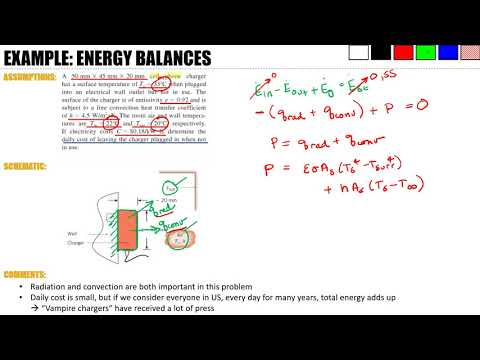

In [ ]:
#@title
from IPython.display import YouTubeVideo
# test video
YouTubeVideo('outzbyu0hgs')


# Problem Statement
A 50 mm $\times$ 45 mm x  20 mm cell phone charger has a surface temprature of $T_s$ = 33$^\text{o}$C when plugged into an electrical wall outlet but not in use. The surface of the charger is of emissivity $\epsilon = 0.92$ and is subject to a free convection heat transfer coefficeint of $h$ = 4.5 $\frac{\text{W}}{\text{m}^2 \text{K}}$. The room air and wall temperatures are $T_\infty$ = 22$^\text{o}$C and $T_{sur}$ = 20$^\text{o}$C, respectively. If electricity costs $C$ = \$0.18/(kW hr), determine the daily cost of leaving the charger plugged in when not in use.

# Schematic

In [ ]:
#@title
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://drive.google.com/uc?export=view&id=1rvyvtz-uzsGsoKy5NO6Br6mSnwEibsRp")

# Assumptions

1.   Wall insulates the left face perfectly 
2.   5 surfaces are exposed to convection and radiation
3.   Uniform properties ($h$, $\epsilon$, etc.)
4.   Steady state
5. Neglect conduction losses through the charger cord



# Analysis
First we need to load the python modules and set up the givens including geometry, properties, boundary condition temperatures, and known constants.

After looking at the solution with the given dimensions and parameters, feel free to come back here, edit this and run the code. You can run the code by :
* hitting play on in the [ ] next to each cell or CTRL+SHIFT+Enter as you read through
* to execute this and the rest of the note book, you can go to "Runtime" in the menu above and choosing "Run All" or hitting CTRL+F9 ()

In [ ]:
# import required modules
import math # math functions
import numpy as np # numerical math
from numpy import *
import matplotlib.pyplot as plt

#Givens
L = 50e-3
W = 20e-3
H = 45e-3
As = 2*(L*W)+2*(W*H)+H*L  # Exposed surface area (m^2) (5 faces)
T_s = 33  # surface temperature (oC)
e = 0.92  # emissivity
h = 4.5   # convection coefficient (W/m^2-K)
T_inf = 22  # Air temperature (oC)
T_sur = 20  # surroundings temperature (oC)
C = 0.18    # electricity cost ($/(kW-hr))
sigma = 5.67*10**-8  # Stefan Boltzmann Constant (W/(m^2 K^4))

# Energy Balance:
Start from an energy balance on the phone charger: $$\dot{E}_{in} -\dot{E}_{out} + \dot{E}_{gen} = \dot{E}_{st}.$$
*  Since the sytem is at steady state $\dot{E}_{st} = 0$.
*  Assuming 5 surfaces are uniformly exposed to convection and radiation: $\dot{E}_{out} = q_{conv} + q_{radiation}.$
*  No surfaces have energy coming in, so $\dot{E}_{in} = 0.$
*  The generation term is related the power consumed by the phone: $\dot{E}_{gen} = P = \dot{q} V $, where $P$ is in Watts and $\dot{q}$ is in W/m$^3$. We want the total power, so we'll stick with $P$.

Thus: $$ - (q_{conv} + q_{rad}) + P = 0 \rightarrow P = \dot{E}_{out} = q_{conv}+q_{rad}.$$
This equation shows that the required power to maintain the surface at $T_s$ is the sum of the radiation and convection losses. The power will be found in Watts since this is the instantaneous form of the energy balance. 
*  The **convection** term is described by Newton's law of Cooling: $q_{conv} = h A_s (T_s - T_\infty)$, where $h$ is given, $A_s$ is the total exposed surface area (5 surfaces), and the temperatures can be in $^\text{o}$C or in K.
*  The **radiation** term is described by the Stefan-Boltzmann Law: $q_{rad} = \epsilon \sigma A_s (T_s^4 - T_{sur}^4)$, where $\epsilon$ is given in the problem statement, $\sigma$ is the Stefan-Boltzmann Constant, and the temperatures are given and **must be expressed in Kelvin**.

In [ ]:
q_conv = h*As*(T_s-T_inf)
q_rad = e*sigma*As*((T_s+273.15)**4-(T_sur+273.15)**4)
P = q_conv+q_rad
print("The convection losses are {:1.2f} W".format(q_conv))
print("The radiation losses are {:1.2f} W".format(q_rad))
print("The total power drain is {:1.2f} W".format(P))

The convection losses are 0.30 W
The radiation losses are 0.44 W
The total power drain is 0.74 W


#Cost

To find the total cost, we must take the power (Watts = Joules/second) and multiply by the time the system is on (here, a day) and the cost factor to get the daily cost. Make sure to convert units appropriately: 
 $$Cost = 0.18  \frac{\$}{kW \text{hr}} \left(\frac{1 kW}{1000 W} \right)  \left(\frac{24 \text{hr}}{1 \text{day}} \right) (P [W]) (1 \text{day})   $$

In [ ]:
Cost = C/1000*24*P*1
print("For 1 phone, the cost is ${:1.4f} per day".format(Cost))


For 1 phone, the cost is $0.0032 per day


This might seem small, but there are many phones just in the US. Let's estimate 300 million cell phones in the US

In [ ]:
USA_Cost = 300000000*Cost;
print("For 300 million phones, the cost is ${:1.2f} per day".format(USA_Cost))
print("For 300 million phones, the energy wasted is {:1.2e} Joules per day".format(P*300000000))


For 300 million phones, the cost is $960627.86 per day
For 300 million phones, the energy wasted is 2.22e+08 Joules per day


# Comments
*   So called "vampire chargers" have made the news a lot, especially in the early 2010's. Some manufacturers have improved the circuitry in chargers to prevent much of this energy drain when the phone is not connected.
*   We made numerous assumptions in this problem to make this problem solvable. Its important to document your assumptions and think about the effect of these on the calculation.
*   You can explore how changing the convection coefficient and emissivity impact the energy costs by changing the variables in the givens section. However, note changing these parameters would also change the steady state temperature reached. You can use an energy balance now that you know the power to predict the new surface temperatures with varying $h$ and $\epsilon$.
*   Its important to change the temperatures to Kelvin for any problem involving radiation due to the $T^4$ relationship between power and temperature.
*   Both radiation and convection are important in this problem.